<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 7.2.2: Boosting

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

This is an excerpt from the [Ensemble Learning to Improve Machine Learning Results-How ensemble methods work: bagging, boosting and stacking](https://blog.statsbot.co/ensemble-learning-d1dcd548e936) by **Vadim Smolyakov**.

## Boosting
**Boosting** refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.

In [ ]:
## Import Libraries

import itertools
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import datasets

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

## Load data

In [ ]:
## Loading the dataset

iris = datasets.load_iris()

# picking just the first two features
X = iris.data[:, 0:2]
# target
y = iris.target

In [ ]:
## Check the data

# About data
print(X.shape)
print(X[:5])

(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [ ]:
# About target
print(y.shape)
print(y[:5])

(150,)
[0 0 0 0 0]


## Modelling

In [ ]:
np.random.seed(0)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
#clf = LogisticRegression()

## Presenting results

Note that the following code will not be needed in the labs. Decision boundaries can be shown when there are two features considered.

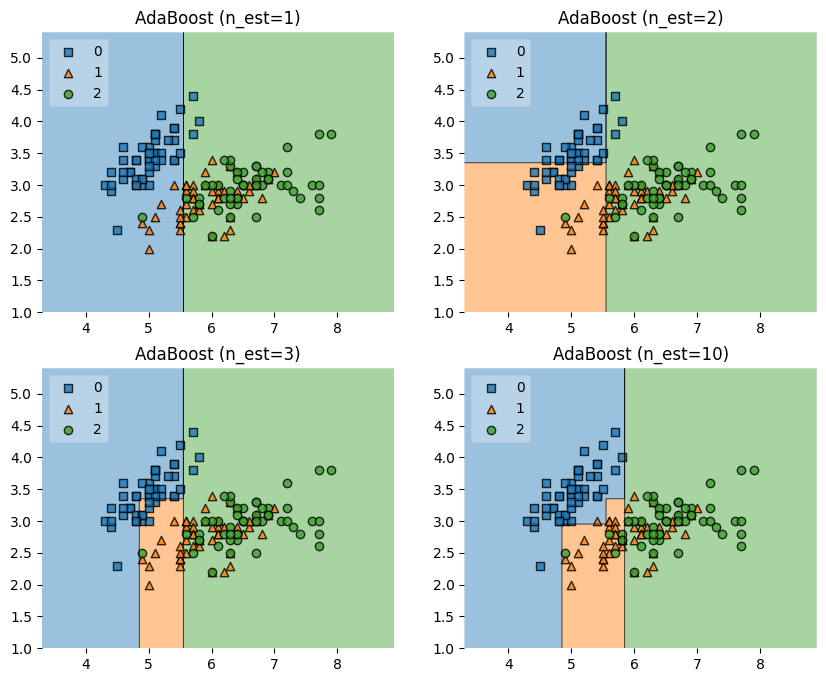

In [ ]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

for n_est, label, grd in zip(num_est, label, grid):
    boosting = AdaBoostClassifier(estimator = clf, n_estimators = n_est)
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X, y = y, clf = boosting, legend = 2)
    plt.title(label)

plt.show()

The AdaBoost algorithm is illustrated in the figure above. Each base learner consists of a decision tree with depth $1$, thus classifying the data based on a feature threshold that partitions the space into two regions separated by a linear decision surface that is parallel to one of the axes.

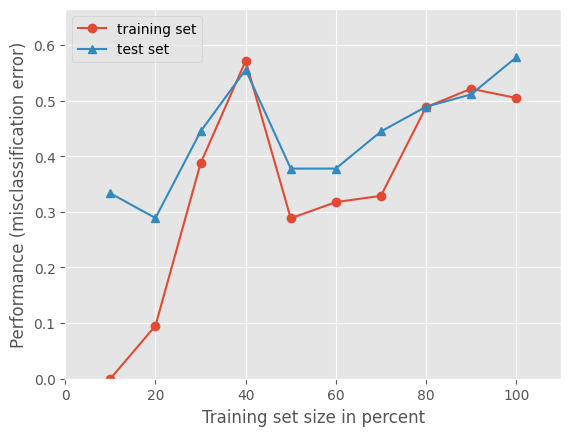

In [ ]:
# plot learning curves
np.random.seed(2534)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

boosting = AdaBoostClassifier(estimator = clf, n_estimators = 10)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.show()

In [ ]:
# Ensemble Size
num_est = np.linspace(1, 100, 20, dtype = np.int8)

np.random.seed(2534)

bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    #ada_clf = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
    grad_clf = GradientBoostingClassifier(n_estimators = n_est)
    #scores = cross_val_score(ada_clf, X, y, cv = 3, scoring = 'accuracy')
    scores = cross_val_score(grad_clf, X, y, cv = 3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

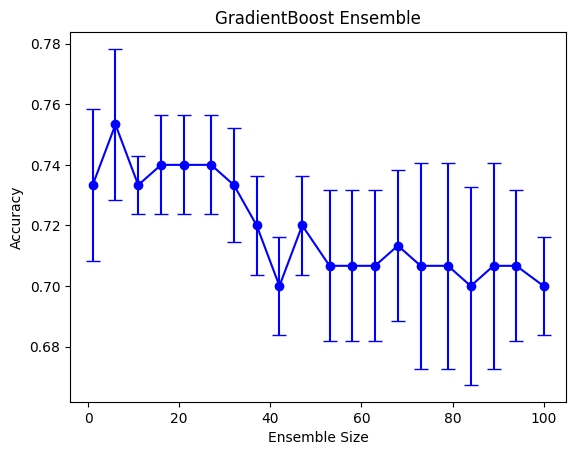

In [ ]:
plt.figure()
(_, caps, _) = plt.errorbar(
    num_est,
    bg_clf_cv_mean,
    yerr = bg_clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)

#plt.title('AdaBoost Ensemble')
plt.title('GradientBoost Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.savefig('c23.png')
plt.show()

The figure above shows how the test accuracy improves with the size of the ensemble.

**Gradient Tree Boosting** is a generalisation of boosting to arbitrary differentiable loss functions. It can be used for both regression and classification problems.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



